In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
train_df = pd.read_csv('train.csv')

In [119]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [120]:
train_df=train_df.drop('PassengerId',axis=1)

In [121]:
train_df = train_df.drop('Name',axis=1)

In [122]:
train_df['VIP'] = train_df['VIP']*1

In [123]:
train_df['CryoSleep']=train_df['CryoSleep']*1

In [124]:
train_df['Transported']=train_df['Transported']*1

In [125]:
homeplanet = pd.get_dummies(train_df['HomePlanet'],drop_first=True)

In [126]:
destination=pd.get_dummies(train_df['Destination'],drop_first=True)

In [127]:
train_df=pd.concat([homeplanet,destination,train_df],axis=1)

In [128]:
train_df=train_df.drop(['Destination','HomePlanet'],axis=1)

In [129]:
train_df.dropna(inplace=True)

In [130]:
train_df.head(2)

,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,1,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1


In [131]:
train_df = train_df.drop('Cabin',axis=1)

In [132]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X = train_df.drop('Transported',axis=1).values
y= train_df['Transported'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [136]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
X_train.shape

(5313, 12)

In [280]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))


# Binary Classification, so activation = 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [294]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))

# Binary Classification, so activation = 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [295]:
early_stop = EarlyStopping(monitor='val_loss',mode=min,verbose=1, patience=25)

In [296]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
167/167 [==============================] - 1s 2ms/step - loss: 0.6678 - val_loss: 0.6242
Epoch 2/600
167/167 [==============================] - 0s 1ms/step - loss: 0.6286 - val_loss: 0.5750
Epoch 3/600
167/167 [==============================] - 0s 1ms/step - loss: 0.5939 - val_loss: 0.5412
Epoch 4/600
167/167 [==============================] - 0s 2ms/step - loss: 0.5806 - val_loss: 0.5278
Epoch 5/600
167/167 [==============================] - 0s 1ms/step - loss: 0.5623 - val_loss: 0.5205
Epoch 6/600
167/167 [==============================] - 0s 1ms/step - loss: 0.5576 - val_loss: 0.5108
Epoch 7/600
167/167 [==============================] - 0s 2ms/step - loss: 0.5501 - val_loss: 0.5027
Epoch 8/600
167/167 [==============================] - 0s 1ms/step - loss: 0.5458 - val_loss: 0.4986
Epoch 9/600
167/167 [==============================] - 0s 1ms/step - loss: 0.5407 - val_loss: 0.4923
Epoch 10/600
167/167 [==============================] - 0s 2ms/step - loss: 0.5316 - val_lo

167/167 [==============================] - 0s 1ms/step - loss: 0.4451 - val_loss: 0.4135
Epoch 82/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4450 - val_loss: 0.4123
Epoch 83/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4425 - val_loss: 0.4105
Epoch 84/600
167/167 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 0.4118
Epoch 85/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4475 - val_loss: 0.4110
Epoch 86/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4446 - val_loss: 0.4120
Epoch 87/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4461 - val_loss: 0.4130
Epoch 88/600
167/167 [==============================] - 0s 2ms/step - loss: 0.4431 - val_loss: 0.4127
Epoch 89/600
167/167 [==============================] - 0s 1ms/step - loss: 0.4443 - val_loss: 0.4118
Epoch 90/600
167/167 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 

<AxesSubplot:>

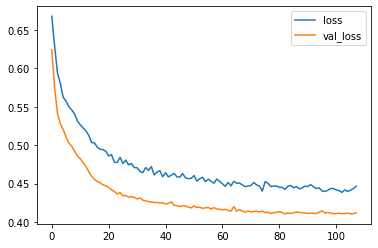

In [297]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [298]:
predictions=((model.predict(X_test)>0.5)*1)

56/56 [==============================] - 0s 871us/step


In [299]:
from sklearn.metrics import classification_report,confusion_matrix

In [300]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       875
           1       0.79      0.86      0.82       896

    accuracy                           0.81      1771
   macro avg       0.82      0.81      0.81      1771
weighted avg       0.82      0.81      0.81      1771



In [301]:
print(confusion_matrix(y_test,predictions))

[[672 203]
 [126 770]]


# Try test data

In [319]:
test = pd.read_csv('test.csv')

In [320]:
test1 = pd.read_csv('test.csv')

In [321]:
# Change bool to int 
test=test.drop(['Name'],axis=1)
test['VIP'] = test['VIP']*1
test['CryoSleep']=test['CryoSleep']*1
homeplanet_test = pd.get_dummies(test['HomePlanet'],drop_first=True)
destination_test=pd.get_dummies(test['Destination'],drop_first=True)
test=pd.concat([homeplanet_test,destination_test,test],axis=1)

# Deal with NaN values
test['CryoSleep']=test['CryoSleep'].fillna(0.3)
test['Age']=test['Age'].fillna(28)
test['VIP']=test['VIP'].fillna(0.02)
test['RoomService']=test['RoomService'].fillna(0.02)
test['FoodCourt']=test['FoodCourt'].fillna(0.03)
test['ShoppingMall']=test['ShoppingMall'].fillna(0.03)
test['Spa']=test['Spa'].fillna(0.03)
test['VRDeck']=test['VRDeck'].fillna(0.2)

# Drop the useless columns
test=test.drop(['Destination','HomePlanet','Cabin'],axis=1)

In [322]:
test=test.drop('PassengerId',axis=1)

In [323]:
test = test.values

In [324]:
test = scaler.fit_transform(test)

In [325]:
predictions=((model.predict(test)>0.5)*1)

134/134 [==============================] - 0s 811us/step


In [326]:
predictions = predictions.tolist()

In [327]:
pass_id = test1['PassengerId'].tolist()

In [328]:
data = {
  "PassengerId": pass_id,
  "Transported": predictions
}
data

{'PassengerId': ['0013_01',
  '0018_01',
  '0019_01',
  '0021_01',
  '0023_01',
  '0027_01',
  '0029_01',
  '0032_01',
  '0032_02',
  '0033_01',
  '0037_01',
  '0040_01',
  '0040_02',
  '0042_01',
  '0046_01',
  '0046_02',
  '0046_03',
  '0047_01',
  '0047_02',
  '0047_03',
  '0048_01',
  '0049_01',
  '0054_01',
  '0054_02',
  '0054_03',
  '0055_01',
  '0057_01',
  '0059_01',
  '0060_01',
  '0063_01',
  '0065_01',
  '0075_01',
  '0079_01',
  '0080_01',
  '0083_01',
  '0087_01',
  '0089_01',
  '0093_01',
  '0094_01',
  '0094_02',
  '0095_01',
  '0096_01',
  '0100_01',
  '0100_02',
  '0104_01',
  '0106_01',
  '0109_01',
  '0117_01',
  '0118_01',
  '0121_01',
  '0124_01',
  '0125_01',
  '0125_02',
  '0130_01',
  '0131_01',
  '0132_01',
  '0135_01',
  '0137_01',
  '0142_01',
  '0142_02',
  '0142_03',
  '0143_01',
  '0145_01',
  '0150_01',
  '0150_02',
  '0153_01',
  '0154_01',
  '0155_01',
  '0156_01',
  '0157_01',
  '0158_01',
  '0158_02',
  '0159_01',
  '0161_01',
  '0162_01',
  '0166_01

In [329]:
submission2 = pd.DataFrame(data).set_index('PassengerId')

In [330]:
def convert_bool(int):
    if int == [1]:
        return 'True'
    else:
        return 'False'

In [331]:
submission2['Transported'] = submission2['Transported'].apply(convert_bool)

In [332]:
submission2

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,True
9271_01,True


In [333]:
submission2.value_counts()

Transported
True           2435
False          1842
dtype: int64

In [334]:
file_name = 'submission2.xlsx'
  
# saving the excel
submission2.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
